In [2]:
import tifffile as tif
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import center_of_mass as com
from scipy.optimize import curve_fit
import os
from scipy.signal import detrend
import scipy.io as sio
from tqdm import tqdm
import math

from mda import *

In [3]:
%matplotlib inline

#Needs to follow inline magick command
import matplotlib
plt.style.use('seaborn-white')
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'viridis'

In [10]:
scan_number=10
path='/CNMshare/savedata/2019R1/20190201/mda/26idbSOFT_%04d'  %scan_number #Scan path

data=readMDA(path, showHelp=0)

In [11]:
#channels=[7,8,9,10,11,12,13] #List of channels you want to plot
#channels=[8,9,10,11,12,13] #List of channels you want to plot
channels=[7,19] #List of channels you want to plot
logyesno=[1,0] #Choose which channels you want in logscale
#channels=[8,9] #List of channels you want to plot

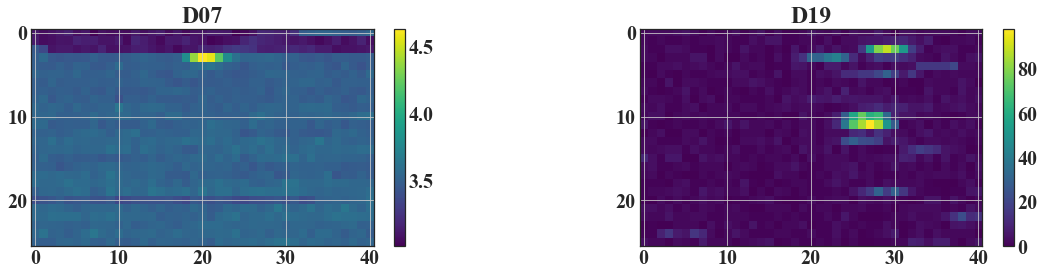

In [16]:
px=int(math.ceil(len(channels)/3))
#fig, ax = plt.subplots(px,3, figsize=(px*10,9))
i,j=0,0

k=0
if (px>1):
    fig, ax = plt.subplots(px,3, figsize=(20,(px-1)*9))
    for c in channels:
        d=data[2].d[c-1].data
        d=np.flipud(d)
        t=data[2].d[c-1].fieldName
        if(logyesno[k]): d=np.log10(d)
        im=ax[i,j].imshow(d)
        cb=plt.colorbar(im, ax=ax[i,j])
        ax[i,j].set_title(t)
        ax[i,j].grid()
        j+=1
        if(j%3==0 and j>0):
            j=0
            i+=1
        k+=1
else:
    fig, ax = plt.subplots(px,len(channels), figsize=(20,4))
    for c in channels:
        d=data[2].d[c-1].data
        d=np.flipud(d)
        t=data[2].d[c-1].fieldName
        if(logyesno[k]): d=np.log10(d)
        im=ax[j].imshow(d)
        cb=plt.colorbar(im, ax=ax[j],fraction=0.046, pad=0.04)
        ax[j].set_title(t)
        ax[j].grid()
        j+=1
        k+=1
